# Setup and read in data

In [1]:
from __future__ import print_function, division

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# update line below with your path to the turnstile data file
data = pd.read_csv('/Users/alexandrasmith/ds/metis/proj1_benson/Turnstile_Usage_Data__2017.csv')

# strip potential spaces
data.columns = data.columns.str.strip()

# Make new features based on Date and Time

In [3]:
# add datetime column and change it to datetime time
data['Formatted_Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format = '%m/%d/%Y %H:%M:%S')

In [4]:
# range of dates of data
print(data.Formatted_Datetime.min())
print(data.Formatted_Datetime.max())

2016-12-31 00:00:00
2017-12-22 23:58:21


In [5]:
# view new column
data.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Formatted_Datetime
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2016,03:00:00,REGULAR,5991546,2028378,2016-12-31 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2016,07:00:00,REGULAR,5991565,2028389,2016-12-31 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2016,11:00:00,REGULAR,5991644,2028441,2016-12-31 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2016,15:00:00,REGULAR,5991971,2028502,2016-12-31 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/31/2016,19:00:00,REGULAR,5992418,2028543,2016-12-31 19:00:00


In [6]:
# check type of new column
data.Formatted_Datetime.dtypes == 'datetime64[ns]'

True

In [7]:
# create a new column get the day of the week
data['Day_of_week'] = data['Formatted_Datetime'].dt.dayofweek # 0 = Monday, 1 = Tuesday, 3 = Wedenesday, etc.
del data['Time'] #not needed anymore
del data['Date']

# add new columns 'date', 'year', 'month', 'day'  
data['Date'] = [d.date() for d in data['Formatted_Datetime']]
data['Year'] = [d.year for d in data['Date']]
data['Month'] = [d.month for d in data['Date']]
data['Day'] = [d.day for d in data['Date']]
data['Hour'] = data['Formatted_Datetime'].dt.hour

In [8]:
# view new columns
data.head(2)

,C/A,Unit,SCP,Station,Line Name,Division,Description,Entries,Exits,Formatted_Datetime,Day_of_week,Date,Year,Month,Day,Hour
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,5991546,2028378,2016-12-31 03:00:00,5,2016-12-31,2016,12,31,3
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,5991565,2028389,2016-12-31 07:00:00,5,2016-12-31,2016,12,31,7


In [9]:
# add new column 'season' 
def seasonFun(mon):
    month=int(mon)
    if month>=3 and month<=5:
        return 'Spring'
    elif month>=6 and month<=8:
        return 'Summer'
    elif month>=9 and month<=11:
        return 'Fall'
    else:
        return 'Winter'
    
data['Season']= [seasonFun(s) for s in data['Month']]

In [10]:
# view new column
data.head(2)

,C/A,Unit,SCP,Station,Line Name,Division,Description,Entries,Exits,Formatted_Datetime,Day_of_week,Date,Year,Month,Day,Hour,Season
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,5991546,2028378,2016-12-31 03:00:00,5,2016-12-31,2016,12,31,3,Winter
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,5991565,2028389,2016-12-31 07:00:00,5,2016-12-31,2016,12,31,7,Winter


In [11]:
# add new column time of day
def timeFun(time):
    
    if time>=5 and time<12:
        return('Morning')
    elif time>=12 and time<17:
        return('Afternoon')
    elif time>=17 and time<21:
        return('Evening')
    else:
        return('Night')
    
data['Time_of_day']= [timeFun(t) for t in data['Hour']]

In [12]:
# view new column
data.head(2)

,C/A,Unit,SCP,Station,Line Name,Division,Description,Entries,Exits,Formatted_Datetime,Day_of_week,Date,Year,Month,Day,Hour,Season,Time_of_day
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,5991546,2028378,2016-12-31 03:00:00,5,2016-12-31,2016,12,31,3,Winter,Night
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,5991565,2028389,2016-12-31 07:00:00,5,2016-12-31,2016,12,31,7,Winter,Morning


In [13]:
mask = ((data["C/A"] == "A002") & 
        (data["Unit"] == "R051") & 
        (data["SCP"] == "02-00-00") & 
        (data["Station"] == "59 ST"))
data[mask].head()

,C/A,Unit,SCP,Station,Line Name,Division,Description,Entries,Exits,Formatted_Datetime,Day_of_week,Date,Year,Month,Day,Hour,Season,Time_of_day
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,5991546,2028378,2016-12-31 03:00:00,5,2016-12-31,2016,12,31,3,Winter,Night
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,5991565,2028389,2016-12-31 07:00:00,5,2016-12-31,2016,12,31,7,Winter,Morning
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,5991644,2028441,2016-12-31 11:00:00,5,2016-12-31,2016,12,31,11,Winter,Morning
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,5991971,2028502,2016-12-31 15:00:00,5,2016-12-31,2016,12,31,15,Winter,Afternoon
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,5992418,2028543,2016-12-31 19:00:00,5,2016-12-31,2016,12,31,19,Winter,Evening


# Check for and get rid of duplicates

In [14]:
(data
 .groupby(["C/A", "Unit", "SCP", "Station", "Formatted_Datetime"])
 .Entries.count()
 .reset_index()
 .sort_values("Entries", ascending=False)).head(5)

,C/A,Unit,SCP,Station,Formatted_Datetime,Entries
3661412,N329A,R201,01-06-01,WOODHAVEN BLVD,2017-03-17 05:00:00,2
7672131,R408,R449,00-00-02,E 149 ST,2017-03-10 08:00:00,2
1025742,C023,R213,00-00-01,BAY RIDGE AV,2017-10-07 16:00:00,2
1025743,C023,R213,00-00-01,BAY RIDGE AV,2017-10-07 20:00:00,2
1025744,C023,R213,00-00-01,BAY RIDGE AV,2017-10-08 00:00:00,2


In [15]:
# on 10/7, we seem to have two entries for same time. let's take a look
mask = ((data["C/A"] == "C023") & 
(data["Unit"] == "R213") & 
(data["SCP"] == "00-00-01") & 
(data["Station"] == "BAY RIDGE AV") &
(data["Formatted_Datetime"].dt.date == pd.datetime(2017, 10, 7).date()))
data[mask].head()

,C/A,Unit,SCP,Station,Line Name,Division,Description,Entries,Exits,Formatted_Datetime,Day_of_week,Date,Year,Month,Day,Hour,Season,Time_of_day
6918204,C023,R213,00-00-01,BAY RIDGE AV,R,BMT,RECOVR AUD,7595913,4642114,2017-10-07 12:00:00,5,2017-10-07,2017,10,7,12,Fall,Afternoon
6918205,C023,R213,00-00-01,BAY RIDGE AV,R,BMT,REGULAR,7595915,4642117,2017-10-07 16:00:00,5,2017-10-07,2017,10,7,16,Fall,Afternoon
6918206,C023,R213,00-00-01,BAY RIDGE AV,R,BMT,RECOVR AUD,6656915,2625182,2017-10-07 16:00:00,5,2017-10-07,2017,10,7,16,Fall,Afternoon
6918207,C023,R213,00-00-01,BAY RIDGE AV,R,BMT,REGULAR,7595915,4642117,2017-10-07 20:00:00,5,2017-10-07,2017,10,7,20,Fall,Evening
6918208,C023,R213,00-00-01,BAY RIDGE AV,R,BMT,RECOVR AUD,6656915,2625182,2017-10-07 20:00:00,5,2017-10-07,2017,10,7,20,Fall,Evening


In [16]:
data.Description.value_counts()

REGULAR       8845081
RECOVR AUD      33122
Name: Description, dtype: int64

In [17]:
# get rid of the duplicate entries
data.sort_values(["C/A", "Unit", "SCP", "Station", "Formatted_Datetime"], inplace=True, ascending=False)
data.drop_duplicates(subset=["C/A", "Unit", "SCP", "Station", "Formatted_Datetime"], inplace=True)

In [18]:
# sanity check to verify that "C/A", "Unit", "SCP", "Station", "Formatted_Datetime" is unique
(data
 .groupby(["C/A", "Unit", "SCP", "Station", "Formatted_Datetime"])
 .Entries.count()
 .reset_index()
 .sort_values("Entries", ascending=False)).head(5)

,C/A,Unit,SCP,Station,Formatted_Datetime,Entries
0,A002,R051,02-00-00,59 ST,2016-12-31 03:00:00,1
5918737,R145,R032,00-06-02,TIMES SQ-42 ST,2017-02-15 03:00:00,1
5918751,R145,R032,00-06-02,TIMES SQ-42 ST,2017-02-17 11:00:00,1
5918750,R145,R032,00-06-02,TIMES SQ-42 ST,2017-02-17 07:00:00,1
5918749,R145,R032,00-06-02,TIMES SQ-42 ST,2017-02-17 03:00:00,1


In [19]:
# sanity check to verify the duplicate we looked at before is gone
data.iloc[6918205:6918207]

,C/A,Unit,SCP,Station,Line Name,Division,Description,Entries,Exits,Formatted_Datetime,Day_of_week,Date,Year,Month,Day,Hour,Season,Time_of_day
6938882,N023,R332,01-00-02,135 ST,BC,IND,REGULAR,861025,2623328,2017-10-13 09:00:00,4,2017-10-13,2017,10,13,9,Fall,Morning
6938881,N023,R332,01-00-02,135 ST,BC,IND,REGULAR,860926,2622981,2017-10-13 05:00:00,4,2017-10-13,2017,10,13,5,Fall,Morning


In [27]:
# turn the 'Description' var into numerical feature
data['RECOVR_AUD'] = np.where(data['Description']!='REGULAR',1,0)

data['RECOVR_AUD'] = (data.groupby(["C/A",
                                    "Unit",
                                    "SCP",
                                    "Station",
                                    data.Formatted_Datetime.dt.date])["RECOVR_AUD"].transform("max"))


In [28]:
data.head()

,C/A,Unit,SCP,Station,Line Name,Division,Description,Entries,Exits,Formatted_Datetime,Day_of_week,Date,Year,Month,Day,Hour,Season,Time_of_day,RECOVR_AUD
7488895,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,321,2017-10-26 13:00:00,3,2017-10-26,2017,10,26,13,Fall,Afternoon,0
7488894,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,321,2017-10-26 09:00:00,3,2017-10-26,2017,10,26,9,Fall,Morning,0
7488893,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,321,2017-10-26 05:00:00,3,2017-10-26,2017,10,26,5,Fall,Morning,0
7488892,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,321,2017-10-26 01:00:00,3,2017-10-26,2017,10,26,1,Fall,Night,0
7488891,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,REGULAR,5554,321,2017-10-25 21:00:00,2,2017-10-25,2017,10,25,21,Fall,Night,0


# Looking at the data per day and calculating Entries per day

In [31]:
# create a df to look at daily data counts
daily_data = data.groupby(["C/A", "Unit", "SCP", "Station", "Date",'RECOVR_AUD']).Entries.first().reset_index()

In [32]:
daily_data.head()

,C/A,Unit,SCP,Station,Date,RECOVR_AUD,Entries
0,A002,R051,02-00-00,59 ST,2016-12-31,0,5992638
1,A002,R051,02-00-00,59 ST,2017-01-01,0,5993515
2,A002,R051,02-00-00,59 ST,2017-01-02,0,5994466
3,A002,R051,02-00-00,59 ST,2017-01-03,0,5996220
4,A002,R051,02-00-00,59 ST,2017-01-04,0,5997865


In [34]:
daily_data[["Prev_Date", "Prev_Entries"]] = (daily_data
                                                       .groupby(["C/A", "Unit", "SCP", "Station"])["Date", "Entries"]
                                                       .transform(lambda grp: grp.shift(1)))

In [35]:
daily_data.head()

,C/A,Unit,SCP,Station,Date,RECOVR_AUD,Entries,Prev_Date,Prev_Entries
0,A002,R051,02-00-00,59 ST,2016-12-31,0,5992638,NaN,NaN
1,A002,R051,02-00-00,59 ST,2017-01-01,0,5993515,2016-12-31,5992638.0
2,A002,R051,02-00-00,59 ST,2017-01-02,0,5994466,2017-01-01,5993515.0
3,A002,R051,02-00-00,59 ST,2017-01-03,0,5996220,2017-01-02,5994466.0
4,A002,R051,02-00-00,59 ST,2017-01-04,0,5997865,2017-01-03,5996220.0


In [36]:
# drop the rows for first date
daily_data.dropna(subset=["Prev_Date"], axis=0, inplace=True)

In [37]:
daily_data[daily_data["Entries"] < daily_data["Prev_Entries"]].head()

,C/A,Unit,SCP,Station,Date,RECOVR_AUD,Entries,Prev_Date,Prev_Entries
4557,A006,R079,00-00-02,5 AV/59 ST,2017-06-18,0,5439826,2017-06-17,7807196.0
9885,A010,R080,00-00-05,57 ST-7 AV,2017-05-15,0,3576,2017-05-14,430596.0
10710,A011,R080,01-00-00,57 ST-7 AV,2017-01-01,0,887351557,2016-12-31,887353077.0
10711,A011,R080,01-00-00,57 ST-7 AV,2017-01-02,0,887349985,2017-01-01,887351557.0
10712,A011,R080,01-00-00,57 ST-7 AV,2017-01-03,0,887347008,2017-01-02,887349985.0


In [38]:
# why is the counter counting in reverse?
mask = ((data["C/A"] == "A011") & 
(data["Unit"] == "R080") & 
(data["SCP"] == "01-00-00") & 
(data["Station"] == "57 ST-7 AV") &
(data["Date"] == pd.datetime(2017, 5, 14).date()))
data[mask].head()

,C/A,Unit,SCP,Station,Line Name,Division,Description,Entries,Exits,Formatted_Datetime,Day_of_week,Date,Year,Month,Day,Hour,Season,Time_of_day,RECOVR_AUD
3340989,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,REGULAR,886974575,492630940,2017-05-14 20:00:00,6,2017-05-14,2017,5,14,20,Spring,Evening,0
3340988,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,REGULAR,886975021,492631285,2017-05-14 16:00:00,6,2017-05-14,2017,5,14,16,Spring,Afternoon,0
3340987,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,REGULAR,886975348,492631844,2017-05-14 12:00:00,6,2017-05-14,2017,5,14,12,Spring,Afternoon,0
3340986,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,REGULAR,886975592,492632296,2017-05-14 08:00:00,6,2017-05-14,2017,5,14,8,Spring,Morning,0
3340985,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,REGULAR,886975661,492632426,2017-05-14 04:00:00,6,2017-05-14,2017,5,14,4,Spring,Night,0


In [39]:
# let's see how many stations have this problem

(daily_data[daily_data["Entries"] < daily_data["Prev_Entries"]]
    .groupby(["C/A", "Unit", "SCP", "Station"])
     .size())

C/A    Unit  SCP       Station        
A006   R079  00-00-02  5 AV/59 ST           1
A010   R080  00-00-05  57 ST-7 AV           1
A011   R080  01-00-00  57 ST-7 AV         314
A016   R081  03-06-01  49 ST                2
A025   R023  01-03-01  34 ST-HERALD SQ    282
             01-03-02  34 ST-HERALD SQ    314
A031   R083  00-00-00  23 ST                1
A034   R170  03-00-01  14 ST-UNION SQ       2
A035   R170  00-00-01  14 ST-UNION SQ       6
             00-00-02  14 ST-UNION SQ       1
             00-00-04  14 ST-UNION SQ       1
A037   R170  05-00-00  14 ST-UNION SQ       2
A042   R086  01-00-04  PRINCE ST            1
A043   R462  00-06-00  CANAL ST             5
A047   R087  00-06-00  CITY HALL            1
A049   R088  02-05-00  CORTLANDT ST       239
A050   R088  00-03-00  CORTLANDT ST         1
             00-06-03  CORTLANDT ST         1
A054   R227  01-00-01  RECTOR ST            1
             01-06-00  RECTOR ST            1
A060   R001  00-00-02  WHITEHALL S-FRY   

In [40]:
def get_daily_counts(row, max_counter):
    counter = row["Entries"] - row["Prev_Entries"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["Entries"], row["Prev_Entries"])
        return(0)
    return(counter)

# if counter is > 1Million, then the counter might have been reset.  
# just set it to zero as different counters have different cycle limits
_ = daily_data.apply(get_daily_counts, axis=1, max_counter=1000000)

5439826 7807196.0
67108879 19154.0
1241453652 11978209.0
1837 6066410.0
1866 10201425.0
67109168 135642.0
201787151 2415394.0
6514 7089651.0
2711 557426588.0
1810 1272207.0
428 2458637.0
100664101 3701460.0
1112 100726770.0
1451 51501987.0
117440752 10219.0
1245 1340550.0
67108864 832.0
262912 67108865.0
100663301 262912.0
189 2960224.0
371 100838424.0
1016 1036316.0
1868 1431723.0
117440653 2163355.0
96 2605955.0
225 2355469.0
0 4017898.0
4017898 0.0
4513888 299176.0
1567691500 1624802.0
574 4607298.0
1211 1128368.0
16796105 61127.0
142 16796105.0
1114258 8913764.0
138 2026070.0
230991 5708897.0
2802 6926320.0
308 5412031.0
285 1238565.0
1409325504 5510695.0
329485 3792069.0
3392662 8238923.0
419299441 285113531.0
285016031 419273605.0
837 284994121.0
539 8186848.0
2031088564 10518173.0
5184970 2684419.0
2684420 5184970.0
117484783 471260.0
458752 4773394.0
584 1615482.0
1946191222 7661697.0
1090546708 4319312.0
805309266 3152624.0
3168141 805330877.0
67604540 117722769.0
231 7586045.

In [41]:
def get_daily_counts(row, max_counter):
    counter = row["Entries"] - row["Prev_Entries"]
    if counter < 0:
        # maybe the counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["Entries"], row["Prev_Entries"])
        counter = min(row["Entries"], row["Prev_Entries"])
    if counter > max_counter:
        # check it again to make sure we are not giving a counter that's too big
        return(0)
    return(counter)

# if counter is > 1Million, then the counter might have been reset.  
# just set it to zero as different counters have different cycle limits
daily_data["Daily_Entries"] = daily_data.apply(get_daily_counts, axis=1, max_counter=1000000)

5439826 7807196.0
67108879 19154.0
1241453652 11978209.0
1837 6066410.0
1866 10201425.0
67109168 135642.0
201787151 2415394.0
6514 7089651.0
2711 557426588.0
1810 1272207.0
428 2458637.0
100664101 3701460.0
1112 100726770.0
1451 51501987.0
117440752 10219.0
1245 1340550.0
67108864 832.0
262912 67108865.0
100663301 262912.0
189 2960224.0
371 100838424.0
1016 1036316.0
1868 1431723.0
117440653 2163355.0
96 2605955.0
225 2355469.0
0 4017898.0
4017898 0.0
4513888 299176.0
1567691500 1624802.0
574 4607298.0
1211 1128368.0
16796105 61127.0
142 16796105.0
1114258 8913764.0
138 2026070.0
230991 5708897.0
2802 6926320.0
308 5412031.0
285 1238565.0
1409325504 5510695.0
329485 3792069.0
3392662 8238923.0
419299441 285113531.0
285016031 419273605.0
837 284994121.0
539 8186848.0
2031088564 10518173.0
5184970 2684419.0
2684420 5184970.0
117484783 471260.0
458752 4773394.0
584 1615482.0
1946191222 7661697.0
1090546708 4319312.0
805309266 3152624.0
3168141 805330877.0
67604540 117722769.0
231 7586045.

In [42]:
daily_data.head()

,C/A,Unit,SCP,Station,Date,RECOVR_AUD,Entries,Prev_Date,Prev_Entries,Daily_Entries
1,A002,R051,02-00-00,59 ST,2017-01-01,0,5993515,2016-12-31,5992638.0,877.0
2,A002,R051,02-00-00,59 ST,2017-01-02,0,5994466,2017-01-01,5993515.0,951.0
3,A002,R051,02-00-00,59 ST,2017-01-03,0,5996220,2017-01-02,5994466.0,1754.0
4,A002,R051,02-00-00,59 ST,2017-01-04,0,5997865,2017-01-03,5996220.0,1645.0
5,A002,R051,02-00-00,59 ST,2017-01-05,0,5999603,2017-01-04,5997865.0,1738.0


In [96]:
daily_data.corr()

,RECOVR_AUD,Entries,Prev_Entries,Daily_Entries
RECOVR_AUD,1.000000,0.002351,0.002294,0.012952
Entries,0.002351,1.000000,0.999487,0.015019
Prev_Entries,0.002294,0.999487,1.000000,0.015170
Daily_Entries,0.012952,0.015019,0.015170,1.000000


In [111]:
#daily_data.groupby([daily_data.Date,'Station']).RECOVR_AUD.count().unstack().plot(figsize=(20,10))

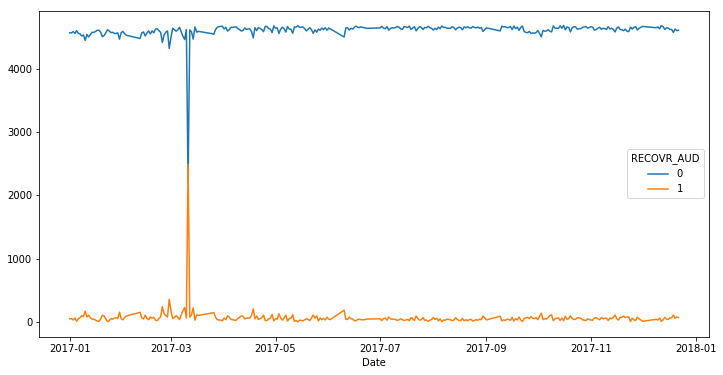

In [126]:
daily_data.groupby([daily_data.Date,'RECOVR_AUD']).RECOVR_AUD.count().unstack().plot(figsize=(12,6))

# Looking at the recovered audits over time

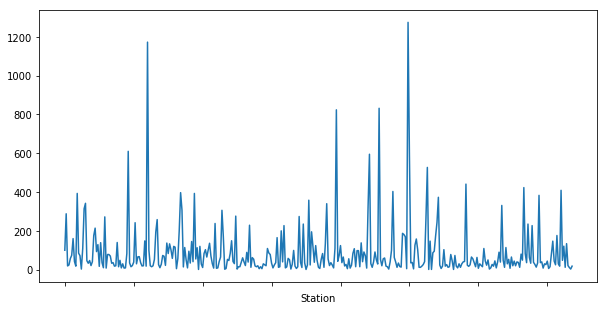

In [130]:
audit_data.groupby(['Station']).Description.count().plot(figsize=(10,5))

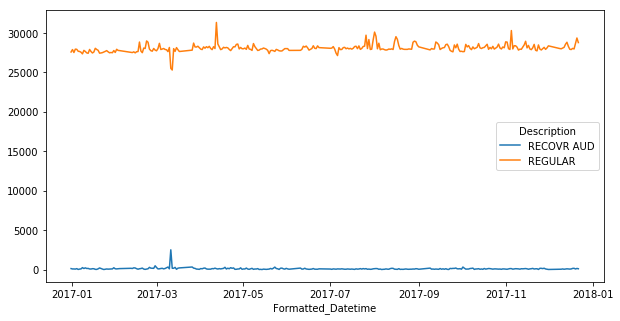

In [131]:
# plotting the description counts over the duration of the time period of the data

data.groupby([data.Formatted_Datetime.dt.date,'Description']).Description.count().unstack().plot(figsize=(10,5))

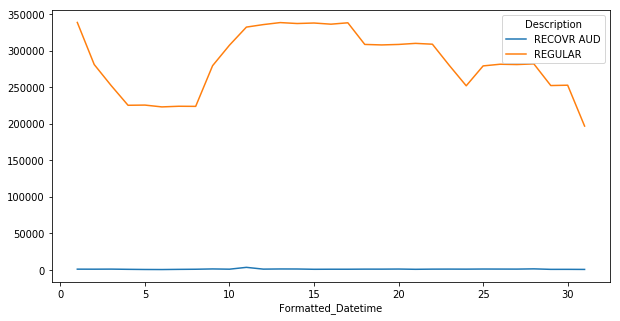

In [136]:
# plotting the description counts per day of the month

data.groupby([data.Formatted_Datetime.dt.day,'Description']).Description.count().unstack().plot(figsize=(10,5))

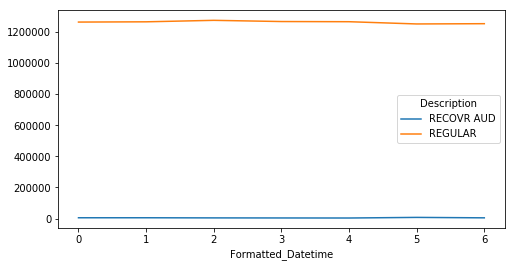

In [138]:
# plotting the description counts per day of the week, 0 = Monday

data.groupby([data.Formatted_Datetime.dt.dayofweek,'Description']).Description.count().unstack().plot(figsize=(8,4))

# Looking at two specific stations

In [90]:
# pick a random station

import random

index = random.randint(0,len(data.Station.unique())-1)

data.Station.unique()[index]

'SMITH-9 ST'

In [52]:
# looking at a single station, Vernon-Jackson, as selected randomly above

Vern_Jack = data[data.Station == 'VERNON-JACKSON']

Vern_Jack.head()

,C/A,Unit,SCP,Station,Line Name,Division,Description,Entries,Exits,Formatted_Datetime,Day_of_week,Date,Year,Month,Day,Hour,Season,Time_of_day,RECOVR_AUD
8856437,R506,R276,02-06-01,VERNON-JACKSON,7,IRT,REGULAR,414836,48399,2017-12-22 23:00:00,4,2017-12-22,2017,12,22,23,Winter,Night,0
8856436,R506,R276,02-06-01,VERNON-JACKSON,7,IRT,REGULAR,414658,48380,2017-12-22 19:00:00,4,2017-12-22,2017,12,22,19,Winter,Evening,0
8856435,R506,R276,02-06-01,VERNON-JACKSON,7,IRT,REGULAR,414152,48336,2017-12-22 15:00:00,4,2017-12-22,2017,12,22,15,Winter,Afternoon,0
8856434,R506,R276,02-06-01,VERNON-JACKSON,7,IRT,REGULAR,413620,48305,2017-12-22 11:00:00,4,2017-12-22,2017,12,22,11,Winter,Morning,0
8856433,R506,R276,02-06-01,VERNON-JACKSON,7,IRT,REGULAR,412461,48287,2017-12-22 07:00:00,4,2017-12-22,2017,12,22,7,Winter,Morning,0


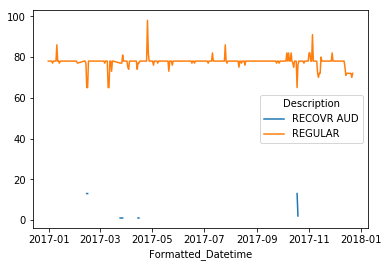

In [53]:
# plotting the type of counts of audits over time

Vern_Jack.groupby([Vern_Jack.Formatted_Datetime.dt.date,'Description']).Description.count().unstack().plot()

In [95]:
# pick another randomly selected station

index = random.randint(0,len(data.Station.unique()))

data.Station.unique()[index]

'SENECA AVE'

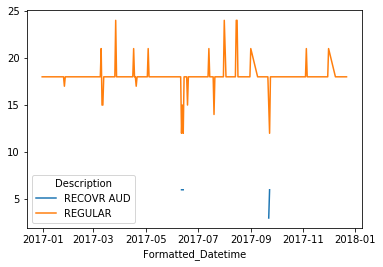

In [55]:
# looking at a Sterling St.

Sterling = data[data.Station == 'STERLING ST']

Sterling.groupby([Sterling.Formatted_Datetime.dt.date,'Description']).Description.count().unstack().plot()

In [56]:
data.groupby(['Station']).Description.value_counts()

Station          Description
1 AV             REGULAR        18941
                 RECOVR AUD       100
103 ST           REGULAR        28215
                 RECOVR AUD       288
103 ST-CORONA    REGULAR        17063
                 RECOVR AUD        19
104 ST           REGULAR        16882
                 RECOVR AUD        24
110 ST           REGULAR        11390
                 RECOVR AUD        57
111 ST           REGULAR        30331
                 RECOVR AUD        74
116 ST           REGULAR        41841
                 RECOVR AUD       160
116 ST-COLUMBIA  REGULAR        11425
                 RECOVR AUD        42
121 ST           REGULAR         8687
                 RECOVR AUD        18
125 ST           REGULAR        82220
                 RECOVR AUD       393
135 ST           REGULAR        43639
                 RECOVR AUD        85
137 ST CITY COL  REGULAR        18905
                 RECOVR AUD        72
138/GRAND CONC   REGULAR         5694
                 RECO

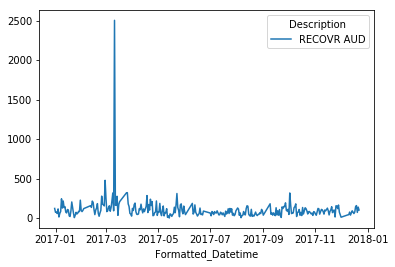

In [57]:
# look at just the Description = 'RECOVR AUD' data

audit_data = data[data.Description == 'RECOVR AUD']

audit_data.groupby([audit_data.Formatted_Datetime.dt.date,'Description']).Description.count().unstack().plot()

In [58]:
Vern_Jack_aud = audit_data[audit_data.Station == 'VERNON-JACKSON']
Sterling_aud = audit_data[audit_data.Station == 'STERLING ST']

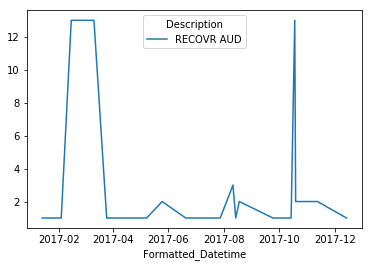

In [59]:
# plotting the counts of RECOVR AUD over time for Vernon-Jackson Station

Vern_Jack_aud.groupby([Vern_Jack_aud.Formatted_Datetime.dt.date,'Description']).Description.count().unstack().plot()

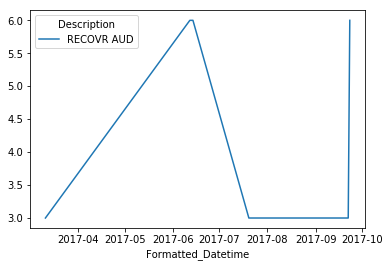

In [60]:
# plotting the counts of RECOVR AUD over time for Sterling St. Station

Sterling_aud.groupby([Sterling_aud.Formatted_Datetime.dt.date,'Description']).Description.count().unstack().plot()